<a href="https://colab.research.google.com/github/RuwanPradeep0/Regression-Model-With-TensorFlow/blob/main/Regression_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd;
import matplotlib.pyplot as plt;
import tensorflow as tf;
import numpy as np;

In [ ]:
data = pd.read_csv("/content/dataset.csv")

In [ ]:
data.shape

(300, 2)

In [ ]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [ ]:
x = data['x']
y = data['y']

In [ ]:
x

0      77
1      21
2      22
3      20
4      36
       ..
295    71
296    46
297    55
298    62
299    47
Name: x, Length: 300, dtype: int64

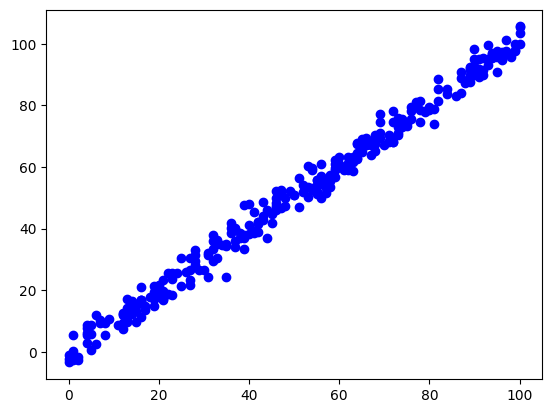

In [ ]:
plt.scatter(x,y , c='b')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=42)

In [ ]:
x_train.shape , x_test.shape

((240,), (60,))

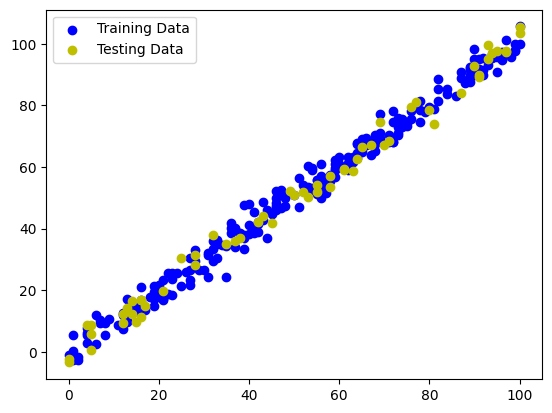

In [ ]:
plt.scatter(x_train,y_train , c='b', label = 'Training Data')
plt.scatter(x_test,y_test , c='y', label = 'Testing Data')
plt.legend()
plt.show()



**Model Building**

In [ ]:
#Create Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8,input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

#Compile model
model.compile(loss = tf.keras.losses.mae ,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

#Train Model
epoch_number = 4
model.fit(tf.expand_dims(x_train,axis=1),y_train,epochs=epoch_number)

Epoch 1/4
8/8 [==============================] - 0s 3ms/step - loss: 40.3084 - mae: 40.3084
Epoch 2/4
8/8 [==============================] - 0s 2ms/step - loss: 23.7370 - mae: 23.7370
Epoch 3/4
8/8 [==============================] - 0s 3ms/step - loss: 26.3614 - mae: 26.3614
Epoch 4/4
8/8 [==============================] - 0s 2ms/step - loss: 22.5165 - mae: 22.5165


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 8)                 16        
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 25 (100.00 Byte)
Trainable params: 25 (100.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_predictions = model.predict([x_test])
y_predictions[:5]

2/2 [==============================] - 0s 6ms/step


array([[89.087715 ],
       [75.23728  ],
       [93.04498  ],
       [ 4.9958124],
       [90.07703  ]], dtype=float32)

<function matplotlib.pyplot.show(close=None, block=None)>

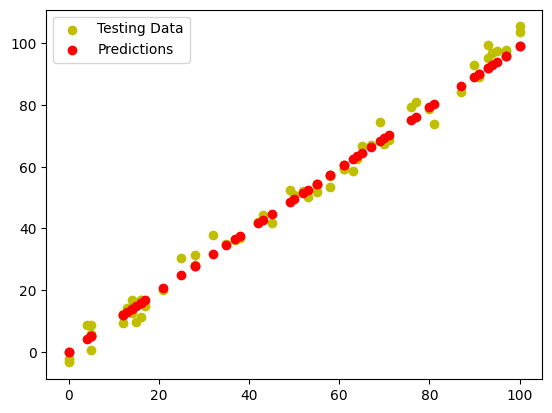

In [ ]:

plt.scatter(x_test,y_test , c='y', label = 'Testing Data')
plt.scatter(x_test,y_predictions , c='r', label = 'Predictions')
plt.legend()
plt.show

In [ ]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 9ms/step - loss: 2.5665 - mae: 2.5665


[2.5664780139923096, 2.5664780139923096]

In [ ]:
#Ussing MAE
mae = tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_predictions))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.5664775>

In [ ]:
#Using MSE
mse = tf.metrics.mean_squared_error(y_test,tf.squeeze(y_predictions))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=10.161878>